In [117]:
from pandas import read_csv, DataFrame, Series
from scipy.stats.stats import pearsonr
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import numpy
import pydot

from IPython.display import Image
from sklearn.externals.six import StringIO 

import matplotlib.pyplot as plt

%matplotlib inline

data = read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


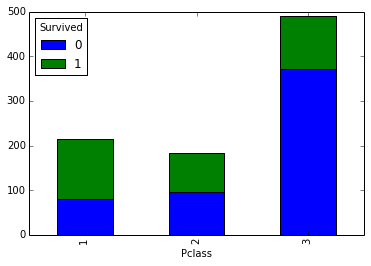

In [23]:
data.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)

In [46]:
def save(name, data):
    print "save", name, ":", data
    with open(name, 'w') as f:
        f.write(data)

In [25]:
sex = data.groupby('Sex').count()['PassengerId']
save("1", "%i %i" % (sex['male'], sex['female']))

1 : 577 314


In [26]:
N = len(data)
print "Total:", N
s = data[data.Survived == 1]
c1 = data[data.Pclass == 1]
a = data[data.Age > 0]
print "Survided:", len(s)
print "Class 1:", len(c1)

save("2", "%.2f" % (100.0 * len(s) / N))
save("3", "%.2f" % (100.0 * len(c1) / N))

Total: 891
Survided: 342
Class 1: 216
Age > 0: 714
2 : 38.38
3 : 24.24


In [32]:
mean = data.Age.mean()
median = data.Age.median()
save("4", "%.2f %.2f" % (mean, median))

4 : 29.70 28.00


In [40]:
numpy.corrcoef(data.SibSp, data.Parch)[0, 1]

0.41483769862015607

In [47]:
result = pearsonr(data.SibSp, data.Parch)
print result
save("5", "%.2f" % result[0])

(0.41483769862015263, 2.2418236681433698e-38)
save 5 : 0.41


In [85]:
def getNameTokens(name):
    return name.replace("\"","").replace("("," ").replace(")"," ").replace("Mrs.","").replace("Miss.","").split(",")[1].split(" ")
            
names = data[data.Sex == 'female'].Name
n2c = {}
(maxcount, name) = 0, ""
for k, v in names.iteritems():
    tok = getNameTokens(v)
    for t in tok:
        if len(t):
            if t in n2c:
                n2c[t] = n2c[t] + 1
                if n2c[t] > maxcount:
                    maxcount = n2c[t]
                    name = t
            else:
                n2c[t] = 1
print name, maxcount
save("6", name)              

Mary 20
save 6 : Mary


In [105]:
# как рисовать деревья
X = numpy.array([[1, 2], [3, 4], [5, 6]])
y = numpy.array([0, 1, 0])
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
importances = clf.feature_importances_
importances
with open("graph.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)
#dot -Tpdf graph.dot -o graph.pdf

In [135]:
cols = data.loc[:, ['Pclass', 'Fare', 'Age', 'Sex', 'Survived']].dropna(how='any')
label = LabelEncoder()
dicts = {}
label.fit(cols.Sex.drop_duplicates())
cols.Sex = label.transform(cols.Sex)

target = cols.Survived
train = cols.drop(['Survived'], axis=1)

In [163]:
clf = DecisionTreeClassifier(random_state=241)
clf = clf.fit(train, target)
features = zip(clf.feature_importances_, ['Pclass', 'Fare', 'Age', 'Sex'])
features.sort(key=lambda tup: tup[0], reverse=True)
save("tree", " ".join([features[0][1], features[1][1]]))


save tree : Fare Sex
